In [ ]:
Problem Set 3
Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called users
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')

In [3]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
#Step 4. Discover what is the mean age per occupation
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [10]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
users['male'] = users.gender.apply(lambda x: True if x == 'M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [8]:
#Step 6. For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [9]:
#Step 7. For each combination of occupation and sex, calculate the mean age
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [11]:
#Step 8. For each occupation present the percentage of women and men
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occup_count = users.groupby(['occupation']).count()

occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

In [ ]:
Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [12]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [14]:
#Step 2. Import the dataset from this address
#Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [15]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [16]:
#Step 4. Select only the Goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [17]:
#Step 5. How many team participated in the Euro2012?
euro12.Team.nunique()

16

In [18]:
#Step 6. What is the number of columns in the dataset?
euro.shape[1]

35

In [19]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [28]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards
red=discipline.sort_values(by=['Red Cards'])
yellow=discipline.sort_values(by=['Yellow Cards'])
print(red)
print(yellow)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1
                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               Engl

In [23]:
#Step 9. Calculate the mean Yellow Cards given per Team
discipline['Yellow Cards'].mean()

7.4375

In [32]:
#Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6].iloc[:,0:2]

,Team,Goals
5,Germany,10
13,Spain,12


In [37]:
#Step 11. Select the teams that start with G
euro12[euro12.Team.str.startswith('G')].iloc[:,0:1]

,Team
5,Germany
6,Greece


In [39]:
#Step 12. Select the first 7 columns
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [40]:
#Step 13. Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [43]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russiadata = euro12.loc[:,['Team','Shooting Accuracy']]
data.loc[[3,7,12],:]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [ ]:
Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [44]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import random

In [45]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000
A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))

In [46]:
#Step 3. Create a DataFrame by joinning the Series by column
join  =  pd . concat ([ A , B , C ], axis = 1 ) 
join . head ()

,0,1,2
0,1,2,10619
1,4,3,20502
2,2,2,18568
3,2,3,12407
4,4,1,20048


In [47]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
join.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
join.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,10619
1,4,3,20502
2,2,2,18568
3,2,3,12407
4,4,1,20048


In [48]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn  =  pd . concat ([ A , B , C ], axis = 0 ) 
bigcolumn

0         1
1         4
2         2
3         2
4         4
      ...  
95    18453
96    29016
97    19914
98    13610
99    10097
Length: 300, dtype: int32

In [49]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
len(bigcolumn)

300

In [ ]:
#Step 6. Ops it seems it is going only until index 99. Is it true?
No the index are kept randomly but the length of the DataFrame is 300


In [50]:
#Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True,inplace=True) 
bigcolumn

0          1
1          4
2          2
3          2
4          4
       ...  
295    18453
296    29016
297    19914
298    13610
299    10097
Length: 300, dtype: int32

In [ ]:
Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [2]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [3]:
#Step 2. Import the dataset from the attached file wind.txt
data=pd.read_csv("wind1.csv")
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,#NUM!,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,#NUM!,10.83,6.5,12.62,7.67,11.5,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.5,16.88,12.33,10.13,11.17,6.17,11.25,#NUM!,8.5,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data.columns

Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')

In [5]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,#NUM!,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,#NUM!,10.83,6.5,12.62,7.67,11.5,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.5,16.88,12.33,10.13,11.17,6.17,11.25,#NUM!,8.5,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [31]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
print(data)

        RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL    CLO  \
0     15.04  14.96  13.17   9.29  #NUM!   9.87  13.67  10.25  10.83  12.58   
1     14.71  #NUM!  10.83    6.5  12.62   7.67   11.5  10.04   9.79   9.67   
2      18.5  16.88  12.33  10.13  11.17   6.17  11.25  #NUM!    8.5   7.67   
3     10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   5.88   
4     13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92  10.34   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6569  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04     14   
6570  13.21   5.46  13.46      5   8.12   9.42  14.33  16.25  15.25  18.05   
6571     14  10.29  14.42   8.71   9.71  10.54  19.17  12.46   14.5  16.42   
6572   18.5  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46  12.12   
6573  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58  11.38   

        BEL    MAL       Date  
0     18.50  15.04 1961-01-01  

In [6]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
index_date = data.set_index("Date")
index_date.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [69]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
print(data.isnull().values.sum())

0


In [70]:
#Step 7. Compute how many non-missing values there are in total.
x=index_date.count()
print("Total Non-missing values are :",x.sum())

Total Non-missing values are : 78888


In [53]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
y = index_date.mean()
y.mean()

C:\Users\KHUSHB~1\AppData\Local\Temp/ipykernel_3884/1432843590.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  y = index_date.mean()


10.10663066626102

In [78]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all thedaysA different set of numbers for each location.
Min = index_date.min()
Max = index_date.max()
Mean = index_date.mean()
Std = index_date.std()
x = [Min,Max,Mean,Std]
var = ["Min","Max","Mean","Std"]
loc_stats = pd.DataFrame(x,var)
loc_stats

C:\Users\KHUSHB~1\AppData\Local\Temp/ipykernel_3884/2565472166.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mean = index_date.mean()
C:\Users\KHUSHB~1\AppData\Local\Temp/ipykernel_3884/2565472166.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Std = index_date.std()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,#NUM!,#NUM!,#NUM!,#NUM!,#NUM!,0.000000,#NUM!,#NUM!,#NUM!,#NUM!,0.130000,#NUM!
Max,9.96,9.96,9.96,9.96,9.96,26.160000,9.96,9.96,9.96,9.96,42.380000,9.96
Mean,NaN,NaN,NaN,NaN,NaN,7.092254,NaN,NaN,NaN,NaN,13.121007,NaN
Std,NaN,NaN,NaN,NaN,NaN,3.968683,NaN,NaN,NaN,NaN,5.835037,NaN


In [79]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day A different set of numbers for each day.
Min = index_date.min()
Max = index_date.max()
Mean = index_date.mean()
Std = index_date.std()
x = [Min,Max,Mean,Std]
var = ["Min","Max","Mean","Std"]
day_stats = pd.DataFrame(x,var)
day_stats

C:\Users\KHUSHB~1\AppData\Local\Temp/ipykernel_3884/531649764.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mean = index_date.mean()
C:\Users\KHUSHB~1\AppData\Local\Temp/ipykernel_3884/531649764.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Std = index_date.std()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,#NUM!,#NUM!,#NUM!,#NUM!,#NUM!,0.000000,#NUM!,#NUM!,#NUM!,#NUM!,0.130000,#NUM!
Max,9.96,9.96,9.96,9.96,9.96,26.160000,9.96,9.96,9.96,9.96,42.380000,9.96
Mean,NaN,NaN,NaN,NaN,NaN,7.092254,NaN,NaN,NaN,NaN,13.121007,NaN
Std,NaN,NaN,NaN,NaN,NaN,3.968683,NaN,NaN,NaN,NaN,5.835037,NaN


In [61]:
#Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
january_data = index_date[index_date.index.month == 1]
print ("January windspeeds:")
print (january_data.mean())

January windspeeds:
BIR     8.054839
BEL    14.550520
dtype: float64


In [7]:
#Step 12. Downsample the record to a yearly frequency for each location.
print( "Yearly:\n", index_date.resample('A').mean())

Yearly:
                  BIR        BEL
Date                           
1972-12-31  6.358825  12.727377
1973-12-31  6.548740  12.169699
1974-12-31  6.809781  13.252959
1975-12-31  5.668521  12.631671
1976-12-31  6.311038  12.332377
...              ...        ...
2067-12-31  7.368164  14.774548
2068-12-31  6.067322  12.808634
2069-12-31  6.189973  12.621233
2070-12-31  7.609452  13.183644
2071-12-31  6.097151  12.208932

[100 rows x 2 columns]


In [8]:
#Step 13. Downsample the record to a monthly frequency for each location.
print ("Monthly:", index_date.resample('M').mean())

Monthly:                  BIR        BEL
Date                           
1972-01-31  7.291290  12.170645
1972-02-29  7.245172  13.124483
1972-03-31  6.949677  11.522581
1972-04-30  7.036333  12.967667
1972-05-31  7.560968  15.366452
...              ...        ...
2071-08-31  4.797742  10.087742
2071-09-30  5.462667   9.232333
2071-10-31  8.562903  15.617097
2071-11-30  7.660000  15.145000
2071-12-31  7.841613  16.759032

[1200 rows x 2 columns]


In [ ]:
#Step 14. Downsample the record to a weekly frequency for each location.
print ("Weekly:", index_date.resample('W').mean())

In [9]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
firstyear = index_date[index_date.index.year==1961]
stats1=index_date.resample('W').mean().apply(lambda x: x.describe())
print (stats1)

              BIR         BEL
count  941.000000  941.000000
mean     7.090037   13.116573
std      2.559691    3.777357
min      1.310000    3.661429
25%      5.194286   10.245714
50%      6.960000   12.708571
75%      8.774286   15.624286
max     15.408571   26.552857


In [ ]:
Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [40]:
#Step 1. Import the necessary libraries
import pandas as pd

In [41]:
#Step 2. Import the dataset from this address.
#Step 3. Assign it to a variable called chipo.

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

In [22]:
#Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [39]:
#Step 5. What is the number of observations in the dataset?
chipo.shape[0]

4622

In [24]:
#Step 6. What is the number of columns in the dataset?
chipo.shape[1]

5

In [26]:
#Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [27]:
#Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [29]:
#Step 9. Which was the most-ordered item?
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [30]:
#Step 10. For the most-ordered item, how many items were ordered?
chipo.item_name.unique().shape[0]

50

In [31]:
#Step 11. What was the most ordered item in the choice_description column?
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [32]:
#Step 12. How many items were orderd in total?
chipo.quantity.sum()

4972

In [42]:
#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [43]:
#Step 14. How much was the revenue for the period in the dataset?
chipo.item_price.sum()

34500.16

In [44]:
#Step 15. How many orders were made in the period?
chipo.order_id.value_counts().shape[0]

1834

In [46]:
#Step 16. What is the average revenue amount per order?
chipo.item_price.mean()

7.464335785374397

In [48]:
#Step 17. How many different items are sold?
chipo.item_name.nunique()

50

In [ ]:
Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = data['Year'].values
marriages = data['Marriages_per_1000'].values
divorces = data['Divorces_per_1000'].values

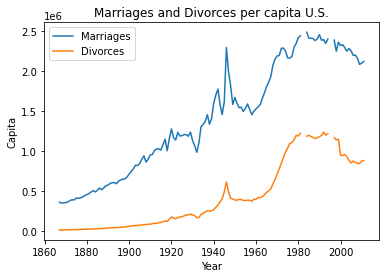

In [25]:
plt.figure
data.plot('Year',y=['Marriages','Divorces'])
plt.title('Marriages and Divorces per capita U.S.')

plt.xlabel('Year')
plt.ylabel('Capita')
plt.show()

In [ ]:
Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

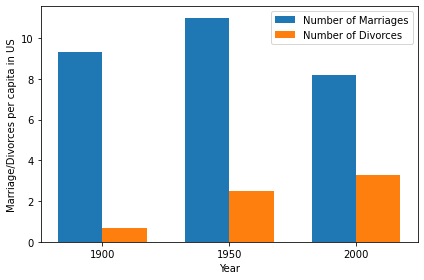

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

marriages_per_capita = data['Marriages_per_1000']
divorces_per_capita = data['Divorces_per_1000']

year = [1900, 1950, 2000]
ind = ["marriages per capita", "divorces per capita"]

specific_data = data.loc[data['Year'] == 1900]
specific_data = specific_data.append(data.loc[data['Year'] == 1950])
specific_data = specific_data.append(data.loc[data['Year'] == 2000])
columns = specific_data['Marriages_per_1000'], specific_data['Divorces_per_1000']

fig, ax = plt.subplots()
bar_width = 0.35
X = np.arange(3)

ax = plt.bar(X, columns[0], bar_width, label="Number of Marriages")
ax = plt.bar(X + bar_width, columns[1], bar_width, label="Number of Divorces")

plt.xlabel('Year')
plt.ylabel('Marriage/Divorces per capita in US')
plt.xticks(X + (bar_width/2) , ("1900", "1950", "2000"))
plt.legend()
plt.tight_layout()

In [ ]:
Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Text(0, 0.5, 'Number of kills')

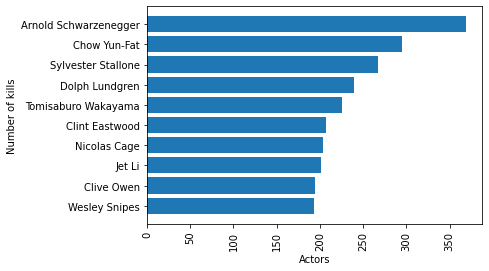

In [19]:
import pandas as pd
kills = pd.read_csv('actor_kill_counts.csv')
kills = kills.sort_values("Count", ascending = True)

actor_names = kills['Actor'].values
kill_counts = kills['Count'].values


plt.barh(actor_names, kill_counts, label=actor_names)
plt.xticks(rotation='vertical')
plt.xlabel("Actors")
plt.ylabel("Number of kills")

In [ ]:
Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('roman-emperor-reigns.csv')
assassinated = df.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, 'Roman Emperors Cause of Death')

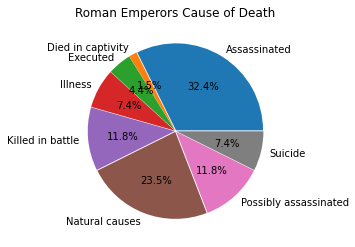

In [15]:
assassinated.plot.pie(autopct="%.1f%%", ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperors Cause of Death")

In [ ]:
Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

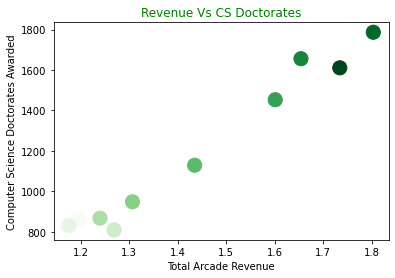

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

arcade = data['Total Arcade Revenue (billions)'].values
doctorates= data['Computer Science Doctorates Awarded (US)'].values
year=data['Year'].values


plt.scatter(arcade, doctorates, s=200, c=year, cmap='Greens')
plt.title('Revenue Vs CS Doctorates', color = 'Green')
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Computer Science Doctorates Awarded')
plt.show()